#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to scikit-learn

<img height="20px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/220px-Scikit_learn_logo_small.svg.png" align="left" hspace="10px"> [Scikit-learn](https://scikit-learn.org) is a machine learning library for Python.

We will explore multiple machine learning libraries throughout this course. Scikit-learn was chosen to be the first due to the approachability of the library and its support for a wide variety of traditional machine learning models, not just deep learning models.

## Overview

### Learning Objectives

* Understand the scikit-learn programming model
* Navigate the variety of features that scikit-learn provides
* Using scikit-learn demonstrate the ability to:
  * load sample data
  * generate sample data
  * transform data
  * train a model
  * make predictions using a model
  * create a data processing and model training pipeline
  * create metrics about model performance
  * visualize predictions returned from a model

### Prerequisites

* Introduction to Colab
* Intermediate Python
* Introduction to Pandas
* Visualizations

### Estimated Duration

60 minutes

### Grading Criteria

Each exercise is worth 3 points. The rubric for calculating those points is:

| Points | Description |
|--------|-------------|
| 0      | No attempt at exercise |
| 1      | Attempted exercise, but code does not run |
| 2      | Attempted exercise, code runs, but produces incorrect answer |
| 3      | Exercise completed successfully |

There are 4 exercises in this Colab so there are 12 points available. The grading scale will be 9 points.

## Datasets

Scikit-learn contains methods for loading, fetching, and making (generating) data. The methods for doing this all fall under the [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) package. Most of the functions in this package have `load`, `fetch`, or `make` in the name to let you know what the method is doing under the hood.

**Loading** functions bring static datasets into your program. The data comes pre-packaged with scikit-learn, so no network access is required.

**Fetching** functions also bring static datasets into your program. However, the data is pulled from the internet (and cached), so if you don't have network access these functions might fail.

**Generating** functions make dynamic datasets based on some equation.

These pre-packaged dataset functions exist for many popular/classic datasets such as the [MNIST digits dataset](https://en.wikipedia.org/wiki/MNIST_database) and the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The generation functions reference classic dataset "shape" formations such as [moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) and [swiss rolls](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll).

These datasets are great for getting introduced to machine learning.

### Loading

Let us first look at an example of loading data. We will load the iris flowers dataset using the [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) function.

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

That's a lot to take in!

Let's examine this loaded data a little more closely. First we'll see what type the data is:

In [3]:
type(iris_data)

sklearn.utils.Bunch

A `sklearn.utils.Bunch` is a class type that you'll see quite often when working with datasets built into scikit-learn. It is a dictionary-like container for feature and target data within a dataset.

You won't find much documentation about `Bunch` objects though because they are not really meant for usage beyond containing data returned by scikit-learn.

Let's look at the attributes of our iris data bunch:

In [4]:
dir(iris_data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

`DESCR` is a description of the dataset.

In [5]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

`filename` is the file where the data is stored.

In [6]:
print(iris_data['filename'])

/Users/dorishuang/anaconda3/lib/python3.6/site-packages/sklearn/datasets/data/iris.csv


`feature_names` are the names of the feature columns.

In [7]:
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


`target_names` are not however the names of the target columns. There is only one column of targets.

Instead, `target_names` are the human-readable names of the classes in the target list within the bunch. In this case they are the names of the three species of iris in this dataset.

Note that the target names are in a list where:

  * setosa is the 0th element
  * versicolor is the 1st element
  * virginica is the 2nd element

In [8]:
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


We can now examine `target` and see that it contains zeros, ones, and twos. These correspond to the target names 'setosa', 'versicolor', and 'virginica'.

In [9]:
print(iris_data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Last we look at the `data` within the bunch. The data is an array of arrays. Each sub-array contains four values. These values match up with the `feature_names`. The first item in each sub-array is 'sepal length (cm)', the next is 'sepal width (cm)', and so on.

In [10]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The number of target values should always equal the number of rows in the data.

In [11]:
print(len(iris_data['data']))
print(len(iris_data['target']))

150
150


`Bunch` objects are a perfectly fine container for data. They can be used directly to feed models.

`Bunch` objects are *not* very good for analyzing and manipulating your data.

In this course we will typically convert `Bunch` objects into Pandas `DataFrame` objects to make analysis, data cleaning, and test/train splitting easier and more uniform.

To do this we will take the matrix of feature data and append the target data to it to create a single matrix of data. We also take the list of feature names and append the word 'species' to represent the target classes in the matrix.

An example of how to do this is below.

In [12]:
import pandas as pd
import numpy as np

iris_df = pd.DataFrame(
  data=np.append(
    iris_data['data'], 
    np.array(iris_data['target']).reshape(len(iris_data['target']), 1), 
    axis=1),
  columns=np.append(iris_data['feature_names'], ['species'])
)

iris_df.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
55,5.7,2.8,4.5,1.3,1.0
140,6.7,3.1,5.6,2.4,2.0
133,6.3,2.8,5.1,1.5,2.0
35,5.0,3.2,1.2,0.2,0.0
68,6.2,2.2,4.5,1.5,1.0
36,5.5,3.5,1.3,0.2,0.0
85,6.0,3.4,4.5,1.6,1.0
6,4.6,3.4,1.4,0.3,0.0
100,6.3,3.3,6.0,2.5,2.0
69,5.6,2.5,3.9,1.1,1.0


You might notice that the integer representation of species got converted to a floating point number along the way. We can change that back.

In [13]:
print(iris_df['species'].dtype)
iris_df['species'] = iris_df['species'].astype('int64')

iris_df.sample(n=10)

float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
54,6.5,2.8,4.6,1.5,1
111,6.4,2.7,5.3,1.9,2
106,4.9,2.5,4.5,1.7,2
43,5.0,3.5,1.6,0.6,0
134,6.1,2.6,5.6,1.4,2
98,5.1,2.5,3.0,1.1,1
14,5.8,4.0,1.2,0.2,0
66,5.6,3.0,4.5,1.5,1


### Fetching

Fetching is similar to loading. Scikit-learn will first see if it can find the dataset locally and if so will simply load the data. Otherwise, it will attempt to pull the data from the internet.

We can see fetching in action with the [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) function below. If you run the code block once you should see a message that the data is downloading. If you run it again you won't see that message because the data is already local to your running code.

In [14]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

type(housing_data)

sklearn.utils.Bunch

The dataset is once again given to us as a `Bunch`.

If you followed the link to the [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) you notice that the dataset is a **regression** dataset as opposed the iris dataset, which was a **classification** dataset.

We can see the difference in the dataset by checking out the attributes of the `Bunch`.

In [15]:
dir(housing_data)

['DESCR', 'data', 'feature_names', 'target']

We see that four of the attributes that we expect are present, but 'target_names' is missing. This is because our target is now a home price and not a discrete value like an iris species.

In [16]:
print(housing_data['target'][:10])

[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


Converting a `Bunch` of regression data to a `DataFrame` is no different than converting a `Bunch` of classification data.

In [17]:
import pandas as pd
import numpy as np

housing_df = pd.DataFrame(
  data=np.append(
    housing_data['data'], 
    np.array(housing_data['target']).reshape(len(housing_data['target']), 1), 
    axis=1),
  columns=np.append(housing_data['feature_names'], ['price'])
)

housing_df.sample(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
20598,1.9122,38.0,4.379052,0.987531,837.0,2.087282,39.15,-121.58,0.55500
3376,2.6036,29.0,3.327698,1.023407,1886.0,2.452536,34.25,-118.28,1.62100
3166,2.0921,29.0,4.578431,1.035948,1344.0,4.392157,35.27,-118.91,0.61400
8575,5.3080,37.0,4.635294,1.014706,662.0,1.947059,33.90,-118.42,5.00001
3558,5.6149,34.0,6.552699,1.000000,2239.0,2.877892,34.25,-118.57,2.73100
15654,1.4552,52.0,1.902087,1.059390,1007.0,1.616372,37.79,-122.40,4.50000
8750,6.0176,36.0,5.808962,1.054245,1125.0,2.653302,33.82,-118.37,3.52700
11759,4.9000,12.0,6.566485,1.049180,1556.0,2.834244,38.72,-121.24,2.03700
18043,10.0187,20.0,8.496377,1.166667,890.0,3.224638,37.21,-121.95,5.00001
17805,4.5187,16.0,4.605263,1.074561,722.0,3.166667,37.38,-121.87,1.63500


### Generating

In the example datasets we've seen so far in this colab, the data is static and loaded from a file. Sometimes it makes more sense to generate a dataset. For this we use one of the many [generator](https://scikit-learn.org/stable/modules/classes.html#samples-generator) functions.

`make_regression` is a generator that will create a dataset with an underlying regression that you can then attempt to discover using various machine learning models.

In the example below we create a dataset with 10 data points. For the sake of visualization we have only one feature per datapoint, but we could ask for more.

The return value are the X and y values for the regression. The X is a matrix of features. The y is a list of targets.

Since a generator uses randomness to generate data, we are going to set a random_state in this colab for reproducibility. **You won't do this in your production code.**

In [18]:
from sklearn.datasets import make_regression

features, targets = make_regression(n_samples=10, n_features=1, random_state=42)

features, targets

(array([[ 1.57921282],
        [ 0.64768854],
        [-0.46947439],
        [ 0.76743473],
        [ 0.54256004],
        [-0.23413696],
        [-0.1382643 ],
        [ 1.52302986],
        [ 0.49671415],
        [-0.23415337]]),
 array([28.71403184, 11.77659472, -8.53621648, 13.95387945,  9.86509621,
        -4.25719445, -2.5139902 , 27.69248537,  9.03150346, -4.25749297]))

We can use a visualization library to plot the regression data.

In [19]:
import matplotlib.pyplot as plt

plt.plot(features, targets, 'b.')
plt.show()

<Figure size 640x480 with 1 Axes>

That data does have a very linear pattern!

If we want to make it more realistic, just add some noise during data generation.

**Remember that random_state is for reproducibility only. Don't use this in your code unless you have a good reason to!**

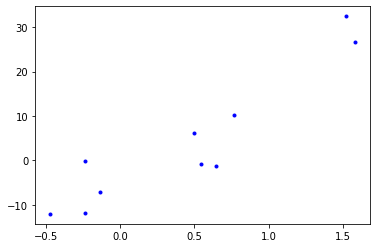

In [20]:
from sklearn.datasets import make_regression

features, targets = make_regression(n_samples=10, n_features=1, random_state=42, noise=5.0)

plt.plot(features, targets, 'b.')
plt.show()

There are dozens of dataset loaders and generators in the scikit-learn [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) package. When you want to play with a new machine learning algorithm, they are a great source of data for getting started.

## Models



Machine learning involves training a model to gain insight and predictive power from a dataset. Scikit-learn has support for many different types of models ranging from classic algebraic models through more modern deep learning models.

Throughout the remainder of this course you will learn about many of these models in much more depth. This section exists to survey some concepts that you will encounter when building and running models in scikit-learn.

### Estimators

Most of the models in scikit-learn are considered [estimators](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn.base.BaseEstimator). An estimator is expected to implement two methods: `fit` and `predict`.

`fit` is used to train the model. At a minimum it is passed the feature data used to train the model. In supervised models it is also passed the target data.

`predict` is used to get predictions from the model. This method is passed features and returns target predictions.

Let's see an example of this in action.

A linear regression is a simple model that you might have encountered in a statistics class in the past. The model attempts to draw a straight line through a set of data points so that the line is as close to as many points as possible.

We'll use scikit-learn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class to fit a line to the regression data that we generated earlier in this colab. To do that we simply call `fit(features, targets)`.

After fitting, we can ask the model for predictions. In this case we just ask for predictions based on the features that we used to train in order to draw a scatter plot of the actual data with the regression line plotted over it by calling `predict(features)`.

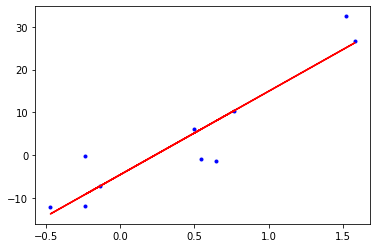

In [21]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(features, targets)
predictions = regression.predict(features)

plt.plot(features, targets, 'b.')
plt.plot(features, predictions, 'r-')
plt.show()

At this point, don't worry too much about the details of what `LinearRegression` is doing. There is a deep-dive into regression problems coming up soon.

For now just note the `fit`/`predict` pattern for training estimators and know that you'll see it throughout our adventures with scikit-learn.

### Transformers

In practice it is rare that you will get perfectly clean data that is ready to feed into your model for training (calling `fit`). Most of the time you will need to perform some type of cleaning on the data first.

You've got some hands-on experience doing this in our Pandas colabs. Scikit-learn can also be used to perform some data preprocessing tasks on your datasets.

Transformers are spread about within the scikit-learn library. Some are in the [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module while others are in more specialized packages like [compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose), [feature_extraction](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction), [impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute), and more.

All transformers implement a `fit` and `transform` methods. The `fit` method calculates parameters necessary to perform the data transformation. `transform` actually applies the transformation. There is a convenience `fit_transform` method that performs both fitting and transformation in one method call.

Let's see a transformer in action.

We will use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) to scale our feature data between zero and one.

Looking at our feature data now we can see values below zero and above one.

In [22]:
features

array([[-0.1382643 ],
       [-0.46947439],
       [ 0.76743473],
       [-0.23413696],
       [-0.23415337],
       [ 0.54256004],
       [ 0.49671415],
       [ 1.52302986],
       [ 1.57921282],
       [ 0.64768854]])

We will now create a `MinMaxScaler` and fit it to our feature data.

Each transformer has different information that it needs to perform a transformation. In the case of the `MinMaxScaler` the smallest and largest values in the data are needed.

In [23]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(features)
transformer.data_min_, transformer.data_max_

(array([-0.46947439]), array([1.57921282]))

You might notice that the values are stored in arrays. This is because transformers can operate on more than one feature. In this case we have only one.

Next we need to apply the transformation to our features.

We can now see that all of the features fall between the range of zero to one.

In [24]:
features = transformer.transform(features)
features

array([[0.16166943],
       [0.        ],
       [0.60375694],
       [0.11487231],
       [0.1148643 ],
       [0.49399168],
       [0.4716135 ],
       [0.97257612],
       [1.        ],
       [0.54530673]])

### Pipelines

It isn't coincidence that transformers have `fit` and `transform` methods and that models have `fit` methods. The common interface across classes allows scikit-learn to create pipelines for data processing and model building.

A [pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) is simply a series of transformers, often with an estimator at the end.

In the example below we use a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class to perform min-max scaling or our feature data and then train a linear regression model using the scaled features.

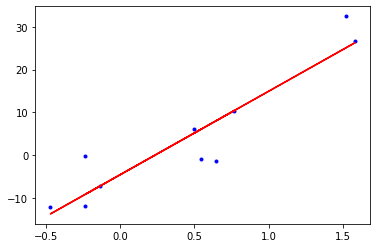

In [25]:
from sklearn.pipeline import Pipeline

features, targets = make_regression(n_samples=10, n_features=1, random_state=42, noise=5.0)

pipeline = Pipeline([
  ('scale', MinMaxScaler()),
  ('regression', LinearRegression())
])

pipeline.fit(features, targets)

predictions = pipeline.predict(features)

plt.plot(features, targets, 'b.')
plt.plot(features, predictions, 'r-')
plt.show()

### Metrics

So far we have seen ways that scikit-learn can help you get data to perform machine learning, modify that data, train a model, and finally make predictions. But how good are the predictions?

Scikit-learn also comes with many functions for measuring model performance in the [metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) package.

Later in this course you will learn about different ways to measure the performance of regression and classification models, as well as, the trade-offs between different metrics.

To illustrate a metrics function in action we'll import the [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function and use it to find the mean squared error (MSE) between the target values that we used to train our linear regression model and the predicted values.

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(targets, predictions)

27.955458970333645

What does the resulting value mean in relation to our model? Is it good or bad?

In this case it doesn't have much meaning aside from being the mean of the squares of the distance between our actual target values and their predicted values. Since the data that we fit the regression to isn't related to any real-world metrics the MSE is just a number.

As we learn more about machine learning and begin training models on real data you'll learn how to interpret MSE and other metrics in context of the data being analyzed and the problem being solved.

There are also metrics in each estimator class. These metrics can be extracted using the `score` method.

The `regression` class we created earlier can be scored, as can the `pipeline`.

In [27]:
print(regression.score(features, targets))
print(pipeline.score(features, targets))

0.8645822498269293
0.8645822498269293


The return value of the `score` method depends on the estimator being used. In the case of `LinearRegression` the score is the r-squared score, where scores closer to 1.0 are better. You can find the metric that `score` returns in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for the estimator that you are using.

## Closing

Scikit-learn is a massive library that contains scores of resources for performing machine learning tasks. In this colab we have only introduced some basic concepts that you will see repeated throughout your career in data science.

We will cover other parts of scikit-learn and go into more depth later in this course.

You are also encouraged to check out the [scikit-learn documentation](https://scikit-learn.org/stable/documentation.html) where you will find a user's guide, tutorials, and a full API reference.

Scikit-learn is an Open Source project. You can find it on [Github](https://github.com/scikit-learn/scikit-learn)

## Resources

* https://scikit-learn.org/stable/documentation.html
* https://en.wikipedia.org/wiki/Scikit-learn
* https://en.wikipedia.org/wiki/Estimator
* https://en.wikipedia.org/wiki/Mean_squared_error
* https://github.com/scikit-learn/scikit-learn

# Exercises

## Exercise 1

Load the [Boston house price dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) into a Pandas `DataFrame`. Append the target values to the last column of the `DataFrame` called `boston_df`. Name the target column 'PRICE'.

### Student Solution

In [28]:
from sklearn.datasets import load_boston
boston_house_data = load_boston()
dir(boston_house_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [29]:
import pandas as pd
import numpy as np

boston_df = pd.DataFrame(
  data=np.append(
    boston_house_data['data'], 
    np.array(boston_house_data['target']).reshape(len(boston_house_data['target']), 1), 
    axis=1),
  columns=np.append(boston_house_data['feature_names'], ['PRICE'])
)

boston_df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
231,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25,31.7
359,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
330,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,5.8736,4.0,430.0,16.9,368.57,9.09,19.8
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70,20.4
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
264,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5.0,264.0,13.0,387.89,8.10,36.5
167,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14,23.8
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24,19.4


## Exercise 2

Search the [scikit-learn datasets documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) and find a function to make a "Moons" dataset. Create a dataset with 75 samples. Use a random state of `42` and a noise of 0.08. Store the X return value in a variable called `features` and the y return value in a variable called `targets`.

### Student Solution

In [30]:
from sklearn.datasets import make_moons
features, target = make_moons(n_samples = 75, noise = 0.08,random_state =42)
features, target

(array([[ 0.97754808,  0.39475539],
        [ 1.78189288, -0.21831832],
        [ 0.65050093,  0.79957261],
        [ 0.92375778, -0.08382965],
        [-1.14624884, -0.02218683],
        [ 1.50110815, -0.46546351],
        [-0.72796104,  0.74708051],
        [ 0.51692696,  0.91378898],
        [ 1.83952168,  0.07913973],
        [ 1.77819003, -0.34058417],
        [-0.90880732,  0.3117695 ],
        [ 0.12540232, -0.04664424],
        [ 0.50184033, -0.35801865],
        [ 0.03742358,  1.05888979],
        [ 0.64473063,  0.63959507],
        [-0.35406285,  0.86244801],
        [ 0.91834691,  0.41354456],
        [-0.75524357,  0.17681177],
        [ 0.97987738, -0.46518352],
        [ 1.84785216,  0.05475808],
        [ 0.14421773,  0.39689783],
        [ 0.05571179,  0.31975237],
        [ 0.12482242,  0.95951448],
        [ 0.05289641, -0.07828259],
        [ 0.29897555, -0.14499539],
        [-0.92794884,  0.47121775],
        [ 0.8770787 ,  0.55311527],
        [ 1.27867297, -0.582

## Exercise 3

In Exercise Two you created a "moons" dataset. In that dataset the features are (x,y)-coordinates that can be graphed in a scatterplot. The targets are zeros and ones that represent a binary classification.

Use matplotlib's [scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) method to visualize the data as a scatterplot. Use the `c` argument to scatter to make the dots for each class a different color.

### Student Solution

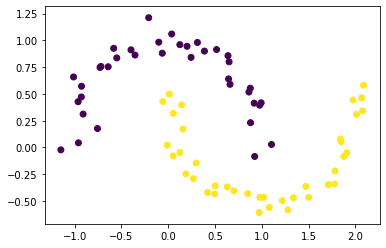

In [31]:
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1],c= target)
plt.show()

## Exercise 4

Use the [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class to combine a data pre-processor and an estimator.

To accomplish this:

1. Find a [preprocessor](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) that uses the max absolute value for scaling.
1. Find a [linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) based on the Huber algorithm.
1. Combine this preprocessor and estimator into a pipeline.
1. Make a sample regression dataset with 200 samples, 1 feature. Use a random state of 85 and a noise of 5.0. Save the features in a variable called `features` and the targets in a variable called `targets`.
1. Fit the model.
1. Using the features that were created when the regression dataset was created, make predictions with the model and save them into a variable called `predictions`.
1. Plot the features and targets used to train the model on a scatterplot with blue dots.
1. Plot the features and predictions over the scatterplot as a red line.

### Student Solution

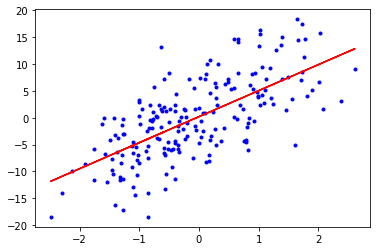

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import HuberRegressor

features, targets = make_regression(n_samples=200, n_features=1, random_state=85, noise=5.0)

pipeline = Pipeline([
  ('scale', MaxAbsScaler()),
  ('regression', HuberRegressor())
])

pipeline.fit(features, targets)

predictions = pipeline.predict(features)

plt.plot(features, targets, 'b.')
plt.plot(features, predictions, 'r-')
plt.show()